# 8.1 Single-Sample t-tests and Degrees of Freedom

## Mean of a single sample against Reference Mean

## **Comparing Means with t-tests**

Copy of learning material from [the lesson's source code here](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/6-statistics.ipynb)

- Where z-scores apply to individual values only, t-tests enables us to compare (the mean of) a sample of multiple values to a reference mean.


## **Student's Single-Sample t-test**

Named after William Sealy Gosset, an Oxford-trained scientist and mathematician, who became a stout yield statistician for Guinness in Dublin (from 1899 to his fatal heart attack in 1937 shortly after being promoted to head brewer). Alongside sabbaticals in Karl Pearson's UCL Biometric Laboratory, Gosset published under the pseudonym Student (including on the t-test, starting in 1908) as it was against Guinness policy to publish.

Recalling the formula for calculating a z-score: $$ z = \frac{x_i-\mu}{\sigma} $$

The single-sample t-test is a variation on the theme and is defined by: $$ t = \frac{\bar{x} - \mu_0}{s_{\bar{x}}} $$ Where:

- $\bar{x}$ is the sample mean
- $\mu_0$ is a reference mean, e.g., known population mean or "null hypothesis" mean
- $s_{\bar{x}}$ is the sample standard error

Let's say you're the head brewer at Guinness. Your baseline brewing process yields 50L of stout. Using a new genetically-modified yeast, you obtain the following yields (all in liters) in four separate experiments:

In [ ]:
x = [48, 50, 54, 60]    # yields using a new genetically-modified yeast

In [ ]:
x_bar = np.mean(x)
print(xbar)

sx = st.sem(x)
sx

53.0


2.6457513110645907

In [ ]:
t = (x_bar-50)/sx   # baseline brewing process yields 50L of stout. 
t                   # t statistic

1.1338934190276817

We can convert the t-value into a p-value using Student's t-distribution (similar to the normal z-distribution, but varies based on number of data points in sample; see [here](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for more detail):

*In probability and statistics, Student's t-distribution (or simply the t-distribution) is any member of a family of continuous probability distributions that arise when estimating the mean of a normally-distributed population in situations where the sample size is small and the population's standard deviation is unknown. It was developed by English statistician William Sealy Gosset under the pseudonym "Student".*

In [ ]:
def p_from_t(t, n):                     # n = number of data points 
    return 2 * st.t.cdf(-abs(t), n-1)   # 2nd arg to t.cdf() is "degrees of freedom"

In [ ]:
p_from_t(t, len(x))     # above 0.05, above the statistically significant p-value.

0.3392540508564543

Interpretation: 
the yield of stout using the newly invented GMO yeast is not significantly greater (as p-value sits within the conventaion range between 2.5 ~ 9.75%) than how it is produced using the existing yeast.

<br/>

In short, there is a 34% chance that we would get a mean of 53 by chance alone. According to the t-test, it turns out that the surplus of 3 litre is likely out of random chance, not the effect of the GMO yeast.


(An illustration of degrees of freedom: If we know the mean of the array x, three of its four values **can vary freely**. That is, if we know three of the values in the array, the fourth has no "freedom"; it must be a specific value. Thus, **the most common situation with statistical tests is that we have $n-1$ degrees of freedom**.)

For everyday usage, however, we can rely on the SciPy `ttest_1samp()` method:


In [ ]:
st.ttest_1samp(x,50)    # 50 = reference mean

Ttest_1sampResult(statistic=1.1338934190276817, pvalue=0.3392540508564543)

# 8.2 Independent t-tests

The independent t-test allows us to compare the mean of two separate samples.


## Comparing the means of two samples
(against each other)


## Welch's Independent t-test

In ordinary circumstances, if we have two samples whose means we'd like to compare, we use an independent t-test.

Text(0.5, 1.05, "these penguins from 'Visualising data with ggplot2', datasciencebox.org\nhttps://rstudio-education.github.io/datascience-box/course-materials/slides/u2-d02-ggplot2/u2-d02-ggplot2.html#4")

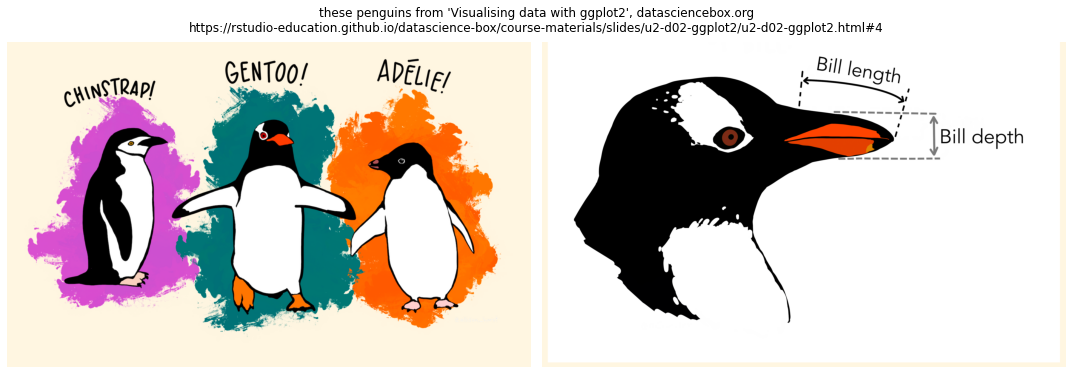

In [ ]:
img = get_img(path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
width, height = img.shape[1], img.shape[0]
half_height = int(height/2)
species = img[:half_height-20, :]
bill = img[half_height+20:, :]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(species)
ax[0].axis('off')
ax[1].imshow(bill)
ax[1].axis('off')
plt.tight_layout()
plt.suptitle("these penguins from 'Visualising data with ggplot2', datasciencebox.org\nhttps://rstudio-education.github.io/datascience-box/course-materials/slides/u2-d02-ggplot2/u2-d02-ggplot2.html#4", y=1.05)

In [ ]:
penguins = sb.load_dataset('penguins').dropna()     # some rows are missing data. 

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
np.unique(penguins.species, return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [ ]:
adelie = penguins[penguins.species == 'Adelie']
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [ ]:
np.unique(adelie.island, return_counts=True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [ ]:
np.unique(adelie.sex, return_counts=True)

(array(['Female', 'Male'], dtype=object), array([73, 73]))

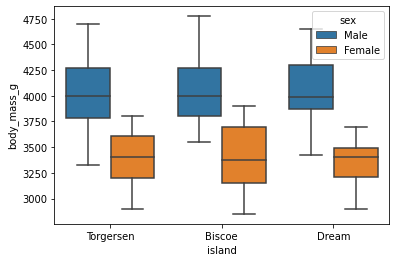

In [ ]:
sb.boxplot(x='island', y='body_mass_g', hue='sex', data=adelie)

In [ ]:
f = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000
f

array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [ ]:
m = adelie[adelie.sex == 'Male']['body_mass_g'].to_numpy()/1000
m

array([3.75 , 3.65 , 4.675, 3.8  , 4.4  , 4.5  , 4.2  , 3.6  , 3.95 ,
       3.8  , 3.55 , 3.95 , 3.9  , 3.9  , 4.15 , 3.95 , 4.65 , 3.9  ,
       4.4  , 4.6  , 3.425, 4.15 , 4.3  , 4.05 , 3.7  , 3.8  , 3.75 ,
       4.4  , 4.05 , 3.95 , 4.1  , 4.45 , 3.9  , 4.15 , 4.25 , 3.9  ,
       4.   , 4.7  , 4.2  , 3.55 , 3.8  , 3.95 , 4.3  , 4.45 , 4.3  ,
       4.35 , 4.1  , 4.725, 4.25 , 3.55 , 3.9  , 4.775, 4.6  , 4.275,
       4.075, 3.775, 3.325, 3.5  , 3.875, 4.   , 4.3  , 4.   , 3.5  ,
       4.475, 3.9  , 3.975, 4.25 , 3.475, 3.725, 3.65 , 4.25 , 3.75 ,
       4.   ])

In [ ]:
f_bar = f.mean()
m_bar = m.mean()

f_bar, m_bar

(3.368835616438356, 4.043493150684932)

To quantify whether males weigh significantly more than females, we can use the Welch t-test, devised by the 20th c. British statistician Bernard Lewis Welch: $$ t = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s^2_x}{n_x} + \frac{s^2_y}{n_y}}} $$ Where:

- $\bar{x}$ and $\bar{y}$ are the sample means
- $s^2_x$ and $s^2_y$ are the sample variances
- $n_x$ and $n_y$ are the sample sizes

N.B.: Student's independent t-test is markedly more popular than Welch's, but Student's assumes equal population variances (i.e., $\sigma^2_x \approx \sigma^2_y$), making it less robust. In case you're curious, Student's formula is the same as Welch's, except that it uses a pooled variance $s^2_p$ in place of individual sample variances ($s^2_x$ and $s^2_y$). You can read more about it here.

---

*"So that isn't too far off the usual standard error calculation for a single sample, but we're pooling together the two standard errors in a way here."*

N.B.: Student's independent t-test is markedly more popular than Welch's, but Student's assumes equal population variances (i.e., $\sigma^2_x \approx \sigma^2_y$), making it less robust. In case you're curious, Student's formula is the same as Welch's, except that it uses a pooled variance $s^2_p$ in place of individual sample variances ($s^2_x$ and $s^2_y$). You can read more about it [here (Independent two-sample t-test)](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test).

In [ ]:
sf = f.var(ddof=1)
sm = m.var(ddof=1)

In [ ]:
nf = f.size
nm = m.size

nf, nm

(73, 73)

In [ ]:
t = (f_bar - m_bar) / (sf/nf + sm/nm)**(1/2)
t

-13.126285923485879

Degrees of freedom for calculating the p-value are estimated using the [Welch–Satterthwaite equation](https://en.wikipedia.org/wiki/Welch%E2%80%93Satterthwaite_equation), which we won't detail but is defined as:

In [ ]:
def ws_equation(sx, sy, nx, ny):
    return (sx / nx + sy / ny)**2 / (sx**2 / (nx**2 * (nx - 1)) + sy**2 / (ny**2 * (ny - 1)))

In [ ]:
df = ws_equation(sf, sm, nf, nm)
df                                  # 135.69357893530386 degrees of freedom

135.69357893530386

In [ ]:
# we do need to add one extra degree of freedom to get exactly the correct value. 
p_from_t(t, df+1)

6.402319748031518e-26

In [ ]:
p = 2 * st.t.cdf(-abs(t), df)
p

6.402319748031518e-26

In [ ]:
# Converting p into our negative log P notation, that's a negative log P value of 25.
# This is an absolutely monstrous P value. 
# It means that we have an extremely statistically significant difference 
# between the weights of the male penguins relative to the female penguins.

-np.log10(p)

25.193662639886046

## NumPy t-test

In [ ]:
st.ttest_ind(f, m, equal_var=False)

Ttest_indResult(statistic=-13.126285923485879, pvalue=6.402319748031518e-26)

# 8.3 Paired t-tests

**Excerpt from the lecture**

"*For example, we could run an experiment where Alzheimer's disease patients receive a drug on one day let's call that the experimental condition, and then a sugar pill placebo on another day, we can call that the control condition. So, we can then measure the patient's forgetfulness on both days to test whether the drug has a significant impact on memory. So, for a given sample size, such as a paired t-test this is more powerful relative to the unpaired independent t-test because the variance of X is directly related to the variance of Y. A severe Alzheimer's patient will tend to be relatively forgetful on both days, while a mild Alzheimer's patient will tend to be relatively unforgetiful on both days. So with paired samples, we capture this power by comparing the difference between X and Y. For example, the difference in forgetfulness for given patients when given the drug relative to when given the sugar pill. In contrast, in the penguin dataset that we were working with in the preceding video, there wouldn't be an obvious way to pair a given male penguin with a corresponding female penguin or consider a situation where we provide a drug to one set of Alzheimer's patients, while we provide a placebo to an entire different, an independent group of patients.*"


In [ ]:
exercise = sb.load_dataset('exercise')
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


There are 30 people in the dataset, with their pulse taken at three different time points in an experiment (i.e, after one, 15, and 30 minutes). Ten people were assigned to each of three activity groups:

In [ ]:
np.unique(exercise.kind, return_counts=True)

(array(['rest', 'running', 'walking'], dtype=object), array([30, 30, 30]))

Within each of those activity groups, half of the participants are on a low-fat diet while the other half are on a no-fat diet:

In [ ]:
np.unique(exercise.diet, return_counts=True)

(array(['low fat', 'no fat'], dtype=object), array([45, 45]))

In [ ]:
walk_no = exercise[(exercise.diet == 'no fat') & (exercise.kind == 'walking')]
walk_no

,Unnamed: 0,id,diet,pulse,time,kind
45,45,16,no fat,84,1 min,walking
46,46,16,no fat,86,15 min,walking
47,47,16,no fat,89,30 min,walking
48,48,17,no fat,103,1 min,walking
49,49,17,no fat,109,15 min,walking
50,50,17,no fat,90,30 min,walking
51,51,18,no fat,92,1 min,walking
52,52,18,no fat,96,15 min,walking
53,53,18,no fat,101,30 min,walking
54,54,19,no fat,97,1 min,walking


"*this paired t-test will allow us to compare a single individual at minute one, minute, 15 minute 30 and it's because of these relative differences.*"

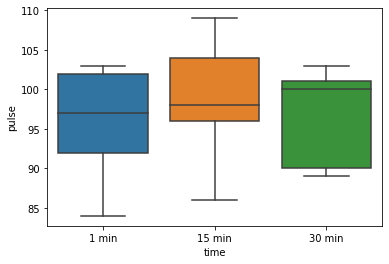

In [ ]:
# so are the increasing heart ratse over time staitstically significant?
sb.boxplot(x='time', y='pulse', data=walk_no)

In [ ]:
min1 = walk_no[walk_no.time == '1 min']['pulse'].to_numpy()
min15 = walk_no[walk_no.time == '15 min']['pulse'].to_numpy()
min30 = walk_no[walk_no.time == '30 min']['pulse'].to_numpy()

min1, min15, min30

(array([ 84, 103,  92,  97, 102]),
 array([ 86, 109,  96,  98, 104]),
 array([ 89,  90, 101, 100, 103]))

In [ ]:
mean1 = min1.mean()
mean15 = min15.mean()
mean30 = min30.mean()

mean1, mean15, mean30

(95.6, 98.6, 96.6)

(With paired samples, we can plot the values in a scatterplot, which wouldn't make any sense for independent samples, e.g.:)

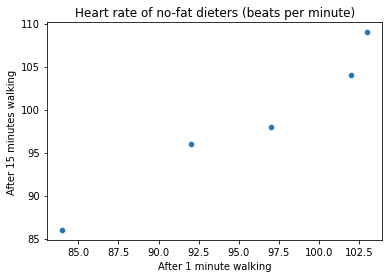

In [ ]:
sb.scatterplot(x=min1, y=min15)
plt.title('Heart rate of no-fat dieters (beats per minute)')
plt.xlabel('After 1 minute walking')
_ = plt.ylabel('After 15 minutes walking')

In [ ]:
d = min15 - min1
d_bar = d.mean()
sd = st.sem(d)
t = (d_bar - 0)/sd

d, d_bar, sd, t

(array([2, 6, 4, 1, 2]), 3.0, 0.8944271909999159, 3.3541019662496847)

In [ ]:
print(  p_from_t(t, d.size))            # statistically significant as below 0.05
print(  st.ttest_rel(min15, min1))

0.02846020325433834
Ttest_relResult(statistic=3.3541019662496847, pvalue=0.02846020325433834)


In [ ]:
st.ttest_rel(min15, min1)

Ttest_relResult(statistic=3.3541019662496847, pvalue=0.02846020325433834)

To assess whether the mean heart rate varies significantly after one minute of walking relative to after 15 minutes, we can use Student's paired-sample (a.k.a., dependent) t-test: $$ t = \frac{\bar{d} - \mu_0}{s_\bar{d}} $$ Where:

- $d$ is a vector of the differences between paired samples $x$ and $y$
- $\bar{d}$ is the mean of the differences
- $\mu_0$ will typically be zero, meaning the null hypothesis is that there is no difference between $x$ and $y$
- $s_\bar{d}$ is the standard error of the differences

(Note how similar to single-sample t-test formula.)


# 8.4 Applications to Machine Learning




## Single Sample T-test

A variation of measure of spread using z-score (std)

- You invent your own ML model and compare it against the established benchmark. 
- Run my model a number of times, get a sample of model outputs of model accuracies. 
- Using the single sample t-test, you can compare the sample of accuracies from your stochastic model against the established benchmark and get an assessment of the statistical significance of your performance.

## Independent T-test

Comparing the means of two different datasets.

- Does your model have **unwanted bias** in it? 
- You can test this using independent samples
- Use independent samples to stratify our data set by different demographic groups.
- Compare the model outputs for one group against the other groups.
  - Are the difference statistically significant?

## Paired Sample T-test

You invented a new TensorFlow model running a neural network in a browser. Is it **significantly faster than the old model** in the browser? 

- Prepare paired samples with varying conditions:
  - Try a bunch of runs with your new model versus your old model and you see which one performs higher than the other. 
  - Run the pairs on different browsers - Safari, Firefox, Chrome, on a mobile device, on a tablet, and on a desktop computer; 
  - Pair by the situations where you test the old model on Safari on an iPhone, and you test the new model on Safari on an iPhone.

# 8.5 Exercises



## Exercise 1 - Stout yields
1. You run four additional experiments with your GMO brewing yeast and now have the following eight stout yields: 

        [48, 50, 54, 60, 49, 55, 59, 62]. 

What is the t-statistic and is it significantly different from the 50L-yielding baseline process?


Degrees of Freedom: if we know the values of the first 7 stout yields and the average of the  8 stout yields is 54.6L, the last yield doesn't have any freedom. It has to be a specific value (62L in this case) to make the mean 54.6L. 
Therefore, the DDOF (n - 1) is: 
$$8 - 1 = 7$$

Answer: 
The GMO yeast yields a mean of 54.6L, which is significantly more stout than the baseline process, t(7) = 2.45, $p < .05$.

In [25]:
stouts = [48, 50, 54, 60, 49, 55, 59, 62]
count = len(stouts)
stouts_mean = np.mean(stouts)
stouts_std = np.sqrt(np.sum([(stout - stouts_mean)**2 for stout in stouts])/count)
benchmark = 50

stouts_mean, stouts_std

(54.625, 4.998437255783052)

In [32]:
# std = np.sqrt(np.sum([(sample - sample_mean)**2 for sample in samples])/len(samples))

def t_test(samples, benchmark):
    sample_mean = np.mean(samples)
    sample_std = st.sem(samples)
    return (sample_mean - benchmark) / sample_std

t = t_test(samples, 50)
t

2.448085108904054

In [33]:
def p_from_t(t, n):                     # n = number of data points 
    return 2 * st.t.cdf(-abs(t), n-1)   # 2nd arg to t.cdf() is "degrees of freedom"

In [34]:
p = p_from_t(t, count)
p

0.0442312968303811

#### Using NumPy and SciPy

In [21]:
sem = st.sem(samples)
sem

1.8892317032517287

In [18]:
st.ttest_1samp(samples, 50)

Ttest_1sampResult(statistic=2.448085108904054, pvalue=0.0442312968303811)

Answer: 
Your GMO yeast DOES produce statistically significant yields.

## Exercise 2 - Flipper lengths

2. Does the flipper length of Adélie penguins from Dream island vary significantly by sex?

Answer: 
- On Dream island, the flippers of male Adélie penguins (191.9 mm) are significantly longer than those of females (187.9 mm)
- $t = 2.4$, $p < .05$.


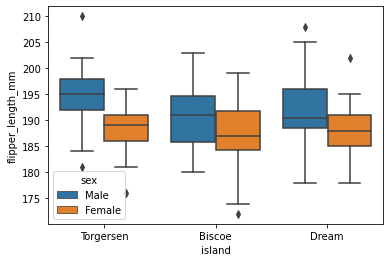

In [53]:
sb.boxplot(x='island', y='flipper_length_mm', hue='sex', data=adelie)

In [46]:
# First, capture the necessary data in vectors.
print(adelie.sex.value_counts())

males = adelie[adelie.sex == 'Male']['flipper_length_mm'].to_numpy()
females = adelie[adelie.sex== 'Female']['flipper_length_mm'].to_numpy()

males, females

Male      73
Female    73
Name: sex, dtype: int64


(array([181., 190., 195., 191., 198., 197., 194., 180., 185., 180., 183.,
        180., 178., 184., 196., 190., 184., 195., 196., 190., 182., 191.,
        188., 200., 191., 193., 194., 195., 192., 192., 188., 198., 190.,
        197., 195., 184., 195., 196., 193., 194., 190., 189., 205., 186.,
        208., 196., 192., 203., 190., 184., 190., 197., 191., 197., 196.,
        199., 189., 198., 202., 199., 195., 210., 197., 199., 190., 200.,
        193., 187., 190., 185., 190., 193., 201.]),
 array([186., 195., 193., 181., 182., 185., 195., 184., 174., 189., 187.,
        187., 172., 178., 188., 195., 180., 181., 182., 186., 185., 190.,
        186., 190., 187., 186., 181., 185., 185., 184., 195., 190., 190.,
        196., 190., 191., 187., 189., 187., 191., 189., 190., 202., 185.,
        187., 190., 178., 192., 183., 193., 199., 181., 198., 193., 191.,
        188., 189., 187., 176., 186., 191., 191., 190., 193., 187., 191.,
        185., 193., 188., 192., 184., 195., 187.]))

In [44]:
male_bar = np.mean(males.flipper_length_mm)
female_bar = np.mean(females.flipper_length_mm)

male_bar, female_bar

(192.41095890410958, 187.7945205479452)

In [48]:
male_var = males.var(ddof=1)
female_var = females.var(ddof=1)

male_var, female_var

(43.5509893455099, 31.304414003044144)

### Manual

In [51]:
t = (male_bar - female_bar) / (male_var/count + female_var/count)**(1/2)
t

4.5588666963515765

### Automatic

In [54]:
t = st.ttest_ind(females, males, equal_var=False)  # equal_var=False  --> Welch's t-test
t   #e-05: very staitistically significant

Ttest_indResult(statistic=-4.5588666963515765, pvalue=1.1099750778082192e-05)

In [58]:
# depending on the order of the input samples, the direction of t value may change.
# but the direction is not important. 

st.ttest_ind(males, females, equal_var=False)

Ttest_indResult(statistic=4.5588666963515765, pvalue=1.1099750778082192e-05)

In [55]:
# p-value
t[1]

1.1099750778082192e-05

In [57]:
# negative log p-value
-np.log10(t[1])

4.954686772287105

3. Was the heart rate of low-fat dieters different after one minute of rest relative to after 15 minutes of rest?


Answer:
- The heart rate of low-fat dieters did not change significantly after one minute of rest (88.6 bpm) relative to after 15 minutes of rest (89.6 bpm).
- $t=2.2$, $p = .09$.

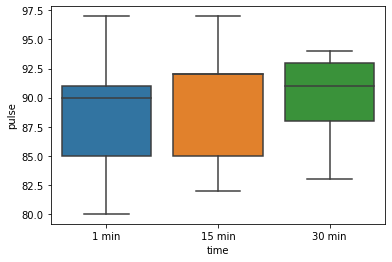

In [61]:
exercise = sb.load_dataset('exercise')

rest_lo = exercise[(exercise.diet == 'low fat') & (exercise.kind == 'rest')]
_ = sb.boxplot(x='time', y='pulse', data=rest_lo)

In [63]:
min1 = rest_lo[rest_lo.time == '1 min']['pulse'].to_numpy()
min15 = rest_lo[rest_lo.time == '15 min']['pulse'].to_numpy()

min1.mean(), min15.mean()

(88.6, 89.6)

In [64]:
st.ttest_rel(min15, min1)

Ttest_relResult(statistic=2.23606797749979, pvalue=0.08900934250008564)

# 8.6 Confidence Intervals

**Applications**: 
- Polling results
- Example statement: "*there is a 95% chance that the population mean lies within this particular range of values.*" 

We can calculate he confidence interval by re-arranging the z-score formula. 


z-score:
$$z = \frac{x_i - \mu}{\sigma}$$

Confidence interval formula: 
$$C.I. =\bar x \pm z\frac{s}{\sqrt n}$$

Where:

- $\bar{x}$ is the sample mean
- $s$ is the sample standard deviation
- $n$ is the sample size
- $z$ corresponds to a z-score threshold (e.g., the most common 95% CI is $z \pm 1.960$; 
- other popular ones are the 90% CI at $z \pm 1.645$ and the 99% CI at $z \pm 2.576$)

For example, to find the 95% confidence interval for the true mean yield of our GMO yeast:


In [65]:
x = np.array([48, 50, 54, 60, 49, 55, 59, 62])

In [67]:
x_bar = x.mean()
s = x.std()
n = x.size

x_bar, s, n

(54.625, 4.998437255783052, 8)

In [68]:
z = 1.96

In [69]:
def CIerror_calc(z, s, n):
    return z*(s/n**(1/2))

In [76]:
# How far our CI is from the mean (x bar)
CIerror = CIerror_calc(z, s, n)
CIerror

3.4637403013216796

In [75]:
# Arr or subtract the error from the bar.
x_bar + CIerror, x_bar - CIerror

(58.08874030132168, 51.16125969867832)

Therefore, there's a 95% chance that the true mean yield of our GMO yeast lies in the range of 51.2 to 58.1 liters. Since this CI doesn't overlap with the established baseline mean of 50L, this corresponds to stating that the GMO yield is significantly greater than the baseline where $\alpha = .05$, as we already determined:


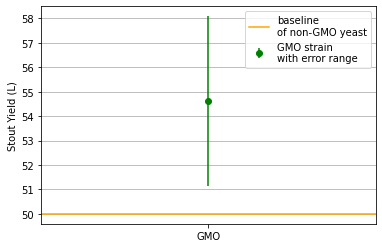

In [82]:
fig, ax = plt.subplots()
plt.ylabel('Stout Yield (L)')
plt.grid(axis='y')
ax.errorbar(['GMO'], [x_bar], [CIerror], fmt='o', color='green', label='GMO strain\nwith error range')
_ = ax.axhline(50, color='orange', label='baseline\nof non-GMO yeast')
plt.legend()

Similarly, we can compare several sample means with CIs. Using our penguins again:

In [95]:
fCIerr = CIerror_calc(z, female_var, females.size)
mCIerr = CIerror_calc(z, male_var, males.size)

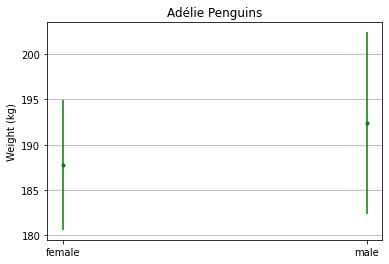

In [96]:
fig, ax = plt.subplots()
plt.title('Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['female', 'male'], [female_bar, male_bar], [fCIerr, mCIerr], 
                fmt='.', color='green')

In [97]:
t = adelie[(adelie.sex == 'Female') & (adelie.island == 'Torgersen')]['body_mass_g'].to_numpy()/1000
b = adelie[(adelie.sex == 'Female') & (adelie.island == 'Biscoe')]['body_mass_g'].to_numpy()/1000
d = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['body_mass_g'].to_numpy()/1000

means = [t.mean(), b.mean(), d.mean()]

In [98]:
# standard error
s_t, sb, sd = t.var(ddof=1), b.var(ddof=1), d.var(ddof=1) # s_t to disambiguate stats package
# number of observations
nt, nb, nd = t.size, b.size, d.size
# Confidence Interval errors
CIerrors = [CIerror_calc(z, s_t, nt), CIerror_calc(z, sb, nb), CIerror_calc(z, sd, nd)]

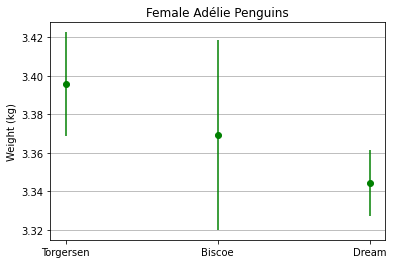

In [99]:
fig, ax = plt.subplots()
plt.title('Female Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['Torgersen', 'Biscoe', 'Dream'], means, CIerrors, 
                fmt='o', color='green')

# 8.7 ANOVA: Analysis of Variance

Enables us to compare more than 2 samples in a single statistical analysis. 

There are 3 assumptions to run ANOVA test. The samples must: 
- independent (not paired)
- normally distributed
- Homoscedasticity: population standard deviations are equal.

While not especially complicated under the hood (you can dig into the formulae [here](https://en.wikipedia.org/wiki/Analysis_of_variance#Logic)), ANOVA might be the least widely-applicable topic within Intro to Stats to ML so in the interest of time, we'll skip straight to the Python code:


In [100]:
# one-way f test. provides f-statistic
st.f_oneway(t, b, d)

# overall, across the three islands, 
# there is no statistically significant difference in female penguin's body mass by island. 
# With the f-statistic one-way ANOVA, we can conclude that: 
# he islands do not cause the female body weights to vary significantly.
# (Islands do not affect body weight).

F_onewayResult(statistic=0.22627752438542714, pvalue=0.7980777848719299)

# Important Functions
- `st.norm.ppf(.025)`
  - `pass in p-value, returns z-score`
- `st.norm.cdf(-2.5)`
  - `pass in z-score, returns p-value`
- `st.t.cdf(-abs(t), ddof)`: most common ddof n-1
- `st.ttest_1samp(observed value, reference mean)`
- `st.ttest_ind(x1, x2, equal_var=False)`
- `st.ttest_rel(x1, x2)`: for paired-sample t-test
- `ax.errorbar(['label'], [sample_mean], [CI error], fmt='o', color='green')`
- `st.f_oneway(sample1, sample2, sample3)`

# Error Notes 
- `TypeError: slice indices must be integers or None or have an __index__ method`
  - Make sure the data type is `int`, not `float` when cropping the image using the pixel index.

## References

My Statistics learning notebook following the live lesson series [**"Probability and Statistics for Machine Learning"**](https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb